In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import collage
import random
import numpy as np
import scipy as sp
from scipy import misc
import matplotlib.pyplot as plt

In [2]:
def read_image(filename, compress=1):
    return misc.imread(filename)[::compress,::compress] / 255.0

### Simple images

In [262]:
files = ["simple_1.png", "simple_2.png", "simple_3.png"]

In [263]:
images = np.rollaxis(np.array([read_image(file) for file in files]), 0, 4)

In [264]:
images.shape

(240, 320, 3, 3)

In [265]:
seeds = np.zeros((images.shape[0], images.shape[1], images.shape[3]), dtype='bool')
seeds[50, 75, 0] = True
seeds[100, 250, 1] = True
seeds[200, 100, 2] = True

Initial energy: 92211474.8999.


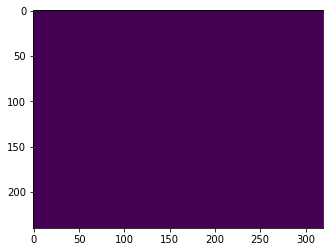

Iteration 1. Time: 0.2894 s. Energy: 92157607.9912.


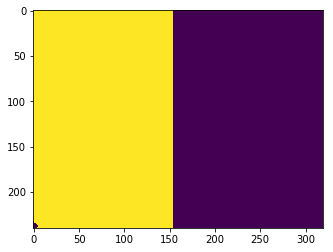

Iteration 2. Time: 0.3058 s. Energy: 92157600.0051.


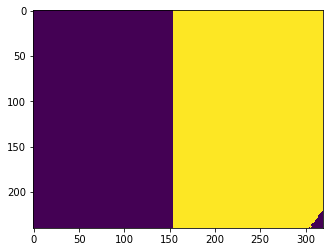

Iteration 3. Time: 0.3152 s. Energy: 92157600.0051.


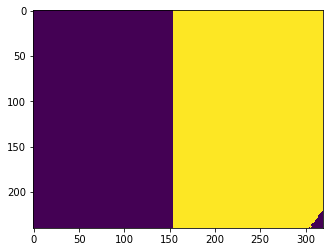

Iteration 4. Time: 0.2878 s. Energy: 92157600.0051.


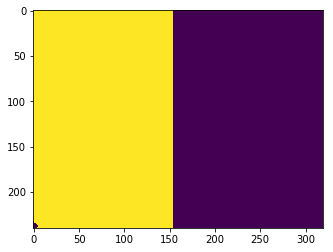

Iteration 5. Time: 0.2903 s. Energy: 92157600.0051.


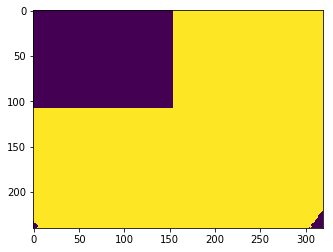

Iteration 6. Time: 0.3339 s. Energy: 92156400.0083.


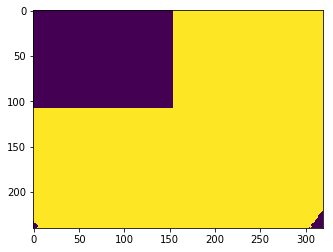

Iteration 7. Time: 0.3429 s. Energy: 92156400.0083.


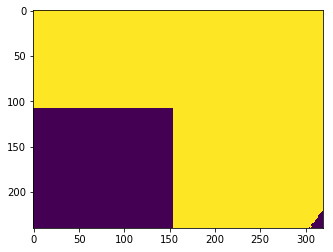

Iteration 8. Time: 0.2934 s. Energy: 92156400.0083.


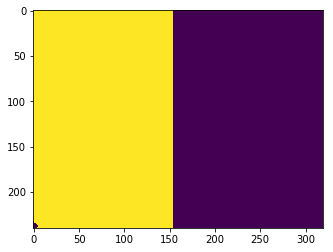

Iteration 9. Time: 0.2949 s. Energy: 92156400.0083.


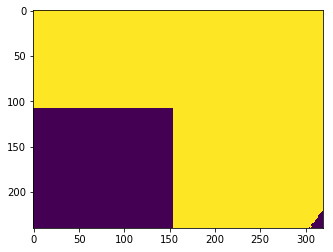

Iteration 10. Time: 0.3279 s. Energy: 92156400.0083.


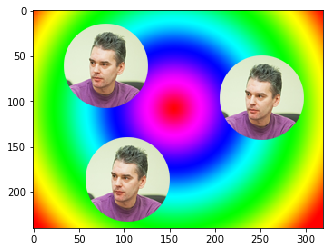

In [267]:
result, labels = collage.stitch_images(images, seeds)
plt.imshow(result)

### Svitlana

In [3]:
folder = "/Users/svetlanaillarinova/Downloads/svitlana"

In [4]:
images = {
    (1000, 2500): ['DSC_1786.JPG', 'DSC_1787.JPG', 'DSC_1788.JPG'],
    (1000, 1450): ['DSC_1790.JPG', 'DSC_1791.JPG', 'DSC_1792.JPG', 'DSC_1795.JPG'],
    (1300, 2900): ['DSC_1796.JPG', 'DSC_1798.JPG'],
    (1900, 2150): ['DSC_1800.JPG', 'DSC_1802.JPG', 'DSC_1803.JPG', 'DSC_1804.JPG'],
    (900, 1100): ['DSC_1805.JPG', 'DSC_1806.JPG', 'DSC_1808.JPG'],
    (1200, 850): ['DSC_1809.JPG', 'DSC_1810.JPG', 'DSC_1811.JPG', 'DSC_1812.JPG', 'DSC_1813.JPG', 'DSC_1815.JPG', 'DSC_1816.JPG', 'DSC_1817.JPG']
}

In [5]:
files = []
keys = [(1000, 1450), (1300, 2900), (1900, 2150), (1200, 850)]
for key in keys:
    idx = random.randint(0, len(images[key]) - 1)
    files.append(os.path.join(folder, images[key][idx]))

In [6]:
input = np.rollaxis(np.array([read_image(file, compress=1) for file in files]), 0, 4)
print input.shape

(2160, 3840, 3, 4)


In [7]:
seeds = np.zeros((input.shape[0], input.shape[1], input.shape[3]), dtype='bool')
for i, key in enumerate(keys):
    for dx in xrange(-10, 11):
        for dy in xrange(-10, 11):
            seeds[key[0] + dx, key[1] + dy, i] = True
seeds[1000, 2000, 2] = True

Initial energy: 1.65881946339e+11.


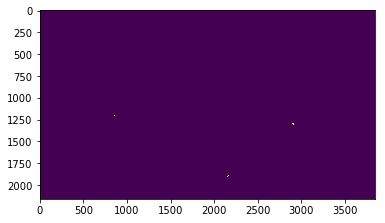

Iteration 1. Time: 13.4371 s. Energy: 165872181295.7953.


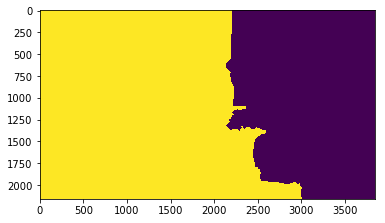

Iteration 2. Time: 282.7193 s. Energy: 165865680691.9731.


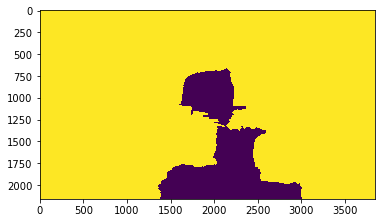

Iteration 3. Time: 114.6688 s. Energy: 165859380097.7384.


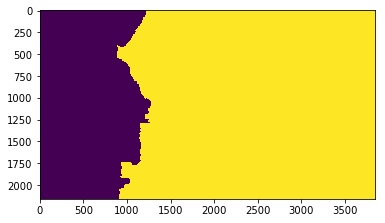

Iteration 4. Time: 174.5680 s. Energy: 165852700004.0261.


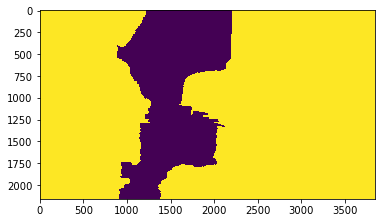

Iteration 5. Time: 109.0730 s. Energy: 165852700004.0261.


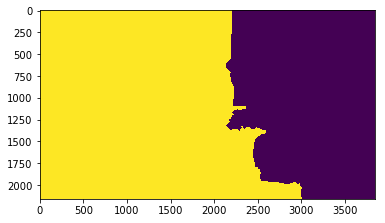

Iteration 6. Time: 31.4645 s. Energy: 165852700004.0261.


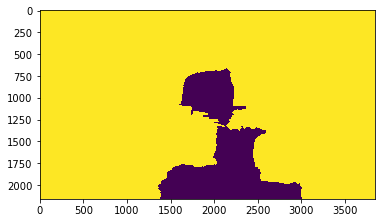

Iteration 7. Time: 44.3665 s. Energy: 165852700004.0261.


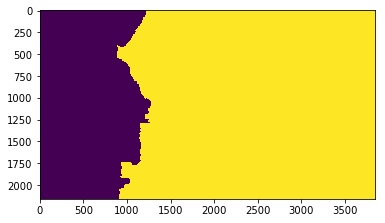

Iteration 8. Time: 30.5934 s. Energy: 165852700004.0261.


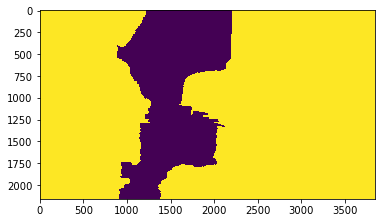

Iteration 9. Time: 94.8648 s. Energy: 165852700004.0261.


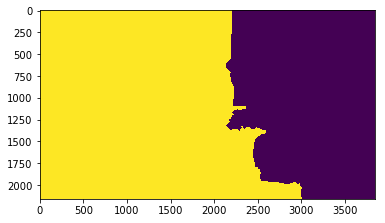

Iteration 10. Time: 25.2597 s. Energy: 165852700004.0261.


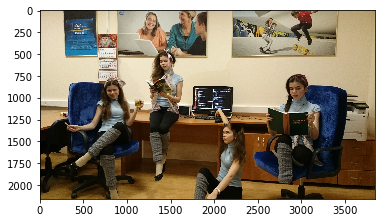

In [8]:
result, labels = collage.stitch_images(input, seeds)
plt.imshow(result)

In [10]:
misc.imsave('result.png', result)

In [ ]:
plt.imshow(labels)